In [1]:
#Import required libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn import svm
import pandas as pd
import numpy as np
import keras as k

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data

df = pd.read_csv("data/lung_cancer_survey.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,LUNG_CANCER
0,M,69.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,YES
2,F,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NO
3,M,63.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,NO
4,F,63.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,NO


In [3]:
# Understanding the Data

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,62.501225,1.562492,1.568899,1.492010,1.501605,1.504810,1.556084,1.556084,1.578510,1.639365
std,8.719480,0.498517,0.497678,0.502329,0.502390,0.502370,0.499274,0.499274,0.496262,0.482813
min,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.497588,0.497588,0.494474,0.480551
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
# Checking for Data Sanity

df.isnull().sum()

GENDER                 0
AGE                    0
SMOKING                0
YELLOW_FINGERS         0
ANXIETY                0
PEER_PRESSURE          0
CHRONIC DISEASE        0
WHEEZING               0
ALCOHOL CONSUMING      0
COUGHING               0
SHORTNESS OF BREATH    0
LUNG_CANCER            4
dtype: int64

In [5]:
# Only 4 of 313 datapoints empty/missing, so we drop the rows

df = df.dropna()

In [6]:
#Encoding

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [7]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,LUNG_CANCER
0,1,69.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1
1,1,74.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1
2,0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0
3,1,63.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0
4,0,63.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0


In [8]:
#Splitting dataset into FeatureMatrix and TargetMatrix

X = df.drop(['LUNG_CANCER'], axis = 1)
y = df['LUNG_CANCER']

In [9]:
#Feature scaling, scales all input feature to lie between 0 and 1

X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [10]:
#Splitting data into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [11]:
#Logistic Regression Model

classification_LR = LogisticRegression(C = 1.0, penalty = 'l2', tol = 0.0001, solver = 'lbfgs')

In [12]:
# Support Vector Machine

#SVC - Support Vector Classifier
classification_SVM_SVC = svm.SVC(kernel = 'linear')  #‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [13]:
# Deep Learning Neural Network

DL_Model = Sequential()
DL_Model.add(Dense(256, input_dim = len(X.columns), kernel_initializer = k.initializers.random_normal(seed = 13), activation = 'relu'))
DL_Model.add(Dense(128, activation = 'relu'))
DL_Model.add(Dense(64, activation = 'relu'))
DL_Model.add(Dense(32, activation = 'relu'))
DL_Model.add(Dense(1, activation = 'hard_sigmoid'))   #softmax

#Compile the model
DL_Model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# Training All Models

classification_LR.fit(X_train, y_train)
classification_SVM_SVC.fit(X_train, y_train)
dl = DL_Model.fit(X_train, y_train, epochs = 50, batch_size = X_train.shape[0], verbose = True)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.1377
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6559
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.8623
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.8623
Epoch 5/50
1/1 [==============================] - 0s 0s/step - loss: 0.6330 - accuracy: 0.8623
Epoch 6/50
1/1 [==============================] - 0s 0s/step - loss: 0.6126 - accuracy: 0.8623
Epoch 7/50
1/1 [==============================] - 0s 0s/step - loss: 0.5898 - accuracy: 0.8623
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.8623
Epoch 9/50
1/1 [==============================] - 0s 0s/step - loss: 0.5367 - accuracy: 0.8623
Epoch 10/50
1/1 [==============================] - 0s 0s/step - loss: 0.5066 - accuracy: 0.8623
Epoch 11/50
1/1 [===========================

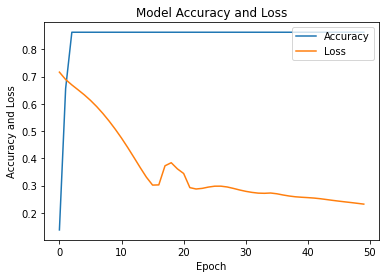

In [23]:
plt.plot(dl.history['accuracy'], label = "Accuracy")
plt.plot(dl.history['loss'], label = "Loss")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(loc = "upper right")

In [16]:
# Predictions and Accuracy Calculations

classification_LR_pred = classification_LR.predict(X_test)
classification_LR_Accuracy = accuracy_score(classification_LR_pred, y_test)
classification_LR_Precision = precision_score(classification_LR_pred, y_test)
classification_LR_Recall = recall_score(classification_LR_pred, y_test)
classification_LR_F1_Score = f1_score(classification_LR_pred, y_test)

classification_SVM_SVC_pred = classification_SVM_SVC.predict(X_test)
classification_SVM_SVC_Accuracy = accuracy_score(classification_SVM_SVC_pred, y_test)
classification_SVM_SVC_Precision = precision_score(classification_SVM_SVC_pred, y_test)
classification_SVM_SVC_Recall = recall_score(classification_SVM_SVC_pred, y_test)
classification_SVM_SVC_F1_Score = f1_score(classification_SVM_SVC_pred, y_test)

DL_Model_pred = DL_Model.predict(X_test)
DL_Model_pred = [1 if y>=0.5 else 0 for y in DL_Model_pred]
DL_Model_Accuracy = accuracy_score(DL_Model_pred, y_test)
DL_Model_Precision = precision_score(DL_Model_pred, y_test)
DL_Model_Recall = recall_score(DL_Model_pred, y_test)
DL_Model_F1_Score = f1_score(DL_Model_pred, y_test)

In [17]:
# Tabulating Results

testing_accuracy = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1 Score"])
testing_accuracy.loc["Logistic Regression"] = [classification_LR_Accuracy, classification_LR_Precision, classification_LR_Recall, classification_LR_F1_Score]
testing_accuracy.loc["Support Vector Classifier"] = [classification_SVM_SVC_Accuracy, classification_SVM_SVC_Precision, classification_SVM_SVC_Recall, classification_SVM_SVC_F1_Score]
testing_accuracy.loc["Deep Learning Neural Network"] = [DL_Model_Accuracy, DL_Model_Precision, DL_Model_Recall, DL_Model_F1_Score]
testing_accuracy = round(testing_accuracy, 2)
testing_accuracy

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.95,0.98,0.97,0.97
Support Vector Classifier,0.92,0.93,0.98,0.95
Deep Learning Neural Network,0.92,1.00,0.92,0.96


In [18]:
# Real Time Testing

#Extract Data
print("Please enter your details: ")
gender = input("Enter your gender (Male: 1; Female: 0): ")
age = input("Enter your age: ")
smoking = input("Do you smoke? (No: 1; Yes: 2): ")
yellow_fingers = input("Do you have yellow fingers (No: 1; Yes: 2): ")
anxiety = input("Do you get anxiety attacks (No: 1; Yes: 2): ")
peer_pressure = input("Do you face peer pressure (No: 1; Yes: 2): ")
chronic_disease = input("Do you have chronic disease (No: 1; Yes: 2): ")
wheezing = input("Do you have wheezing (No: 1; Yes: 2): ")
alcohol_consuming = input("Do you consume alcohol (No: 1; Yes: 2): ")
coughing = input("Do you have severe cough (No: 1; Yes: 2): ")
shortness_breath = input("Do you face breath shortness (No: 1; Yes: 2): ")

# Normalize Data
X_patient = np.array([[int(gender), int(age), float(smoking), float(yellow_fingers), float(anxiety), float(peer_pressure), float(chronic_disease), float(wheezing), float(alcohol_consuming), float(coughing), float(shortness_breath)]])
X_scaler.fit(X_patient)
X_patient = X_scaler.transform(X_patient)

# Prediction for Data
classification_LR_pred_realtime = classification_LR.predict(X_patient)
classification_SVM_SVC_pred_realtime = classification_SVM_SVC.predict(X_patient)
DL_Model_pred_realtime = DL_Model.predict(X_patient)

DL_Model_pred_realtime = [1 if y>=0.5 else 0 for y in DL_Model_pred_realtime]

Please enter your details: 


Enter your gender (Male: 1; Female: 0):  1
Enter your age:  69
Do you smoke? (No: 1; Yes: 2):  2
Do you have yellow fingers (No: 1; Yes: 2):  2
Do you get anxiety attacks (No: 1; Yes: 2):  1
Do you face peer pressure (No: 1; Yes: 2):  1
Do you have chronic disease (No: 1; Yes: 2):  2
Do you have wheezing (No: 1; Yes: 2):  2
Do you consume alcohol (No: 1; Yes: 2):  2
Do you have severe cough (No: 1; Yes: 2):  2
Do you face breath shortness (No: 1; Yes: 2):  2


In [19]:
print("The predictions for Logistic Regression: ")
if classification_LR_pred_realtime == 1:
    print("Congratulations you are safe from Lung Cancer!!")
else:
    print("I am sorry to inform you, you suffer from Lung Cancer. Please contact your family doctor immediately and acquire some medications. Get well soon!")

The predictions for Logistic Regression: 
I am sorry to inform you, you suffer from Lung Cancer. Please contact your family doctor immediately and acquire some medications. Get well soon!


In [20]:
print("The predictions for Support Vector Classifier: ")
if classification_SVM_SVC_pred_realtime == 1:
    print("Congratulations you are safe from Lung Cancer!!")
else:
    print("I am sorry to inform you, you suffer from Lung Cancer. Please contact your family doctor immediately and acquire some medications. Get well soon!")

The predictions for Support Vector Classifier: 
I am sorry to inform you, you suffer from Lung Cancer. Please contact your family doctor immediately and acquire some medications. Get well soon!


In [21]:
print("The predictions for Deep Learning Neural Network: ")
if DL_Model_pred_realtime[0] == 1:
    print("Congratulations you are safe from Lung Cancer!!")
else:
    print("I am sorry to inform you, you suffer from Lung Cancer. Please contact your family doctor immediately and acquire some medications. Get well soon!")

The predictions for Deep Learning Neural Network: 
Congratulations you are safe from Lung Cancer!!
